In [1]:
set.seed(123)
N <- 200
a1 <- 0
S1 <- 1
a2 <- 0
S2 <- 1
r1 <- 0.15
r2 <- 0.75

Устанавливаем начальное значение для генерации случайных чисел с помощью set.seed(), чтобы обеспечить воспроизводимость результатов. Задаем параметры нормального распределения для выборки X1: математическое ожидание a1, стандартное отклонение S1, и объем выборки N = 200. Также задаем параметры для выборок X2 и X3 (a2, S2) и коэффициенты корреляции r1 и r2, где r1 ∈ [0.1; 0.2], r2 ∈ [0.6; 0.9].

In [2]:
X1 <- rnorm(N, a1, S1)

Генерируем выборку X1 из нормального распределения N(a1, S1^2) с помощью функции rnorm(N, a1, S1). Это базовая выборка, которая будет коррелировать с X2 и X3.

Создаем 200 случайных чисел для X1, которые выглядят как нормальный колокол со средним 0 и разбросом 1.

In [3]:
X2 <- r1 * X1 + sqrt(1 - r1^2) * rnorm(N, a2, S2)
X3 <- r2 * X1 + sqrt(1 - r2^2) * rnorm(N, a2, S2)

Генерируем выборки X2 и X3 так, чтобы они имели заданные коэффициенты корреляции с X1: r1 = 0.15 и r2 = 0.75. Формулы:

X2 = r1 * X1 + sqrt(1 - r1^2) * rnorm(N, a2, S2),

X3 = r2 * X1 + sqrt(1 - r2^2) * rnorm(N, a2, S2).

Это обеспечивает корреляцию между X1 и X2 равной r1, а между X1 и X3 — r2.
X2 связана слабо (r1 = 0.15), а X3 — сильно (r2 = 0.75).

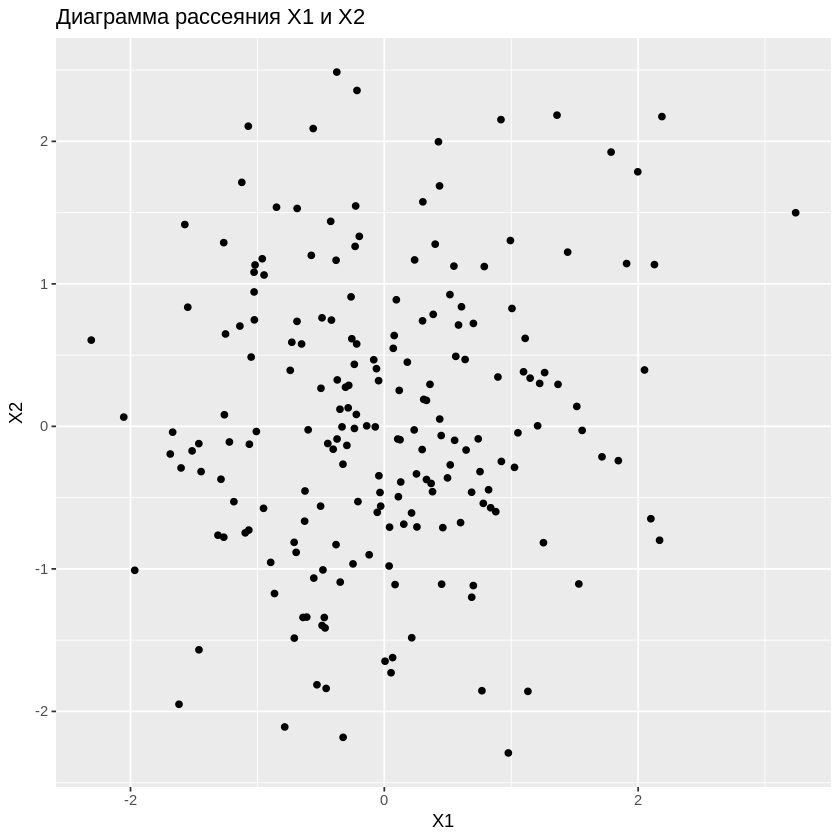

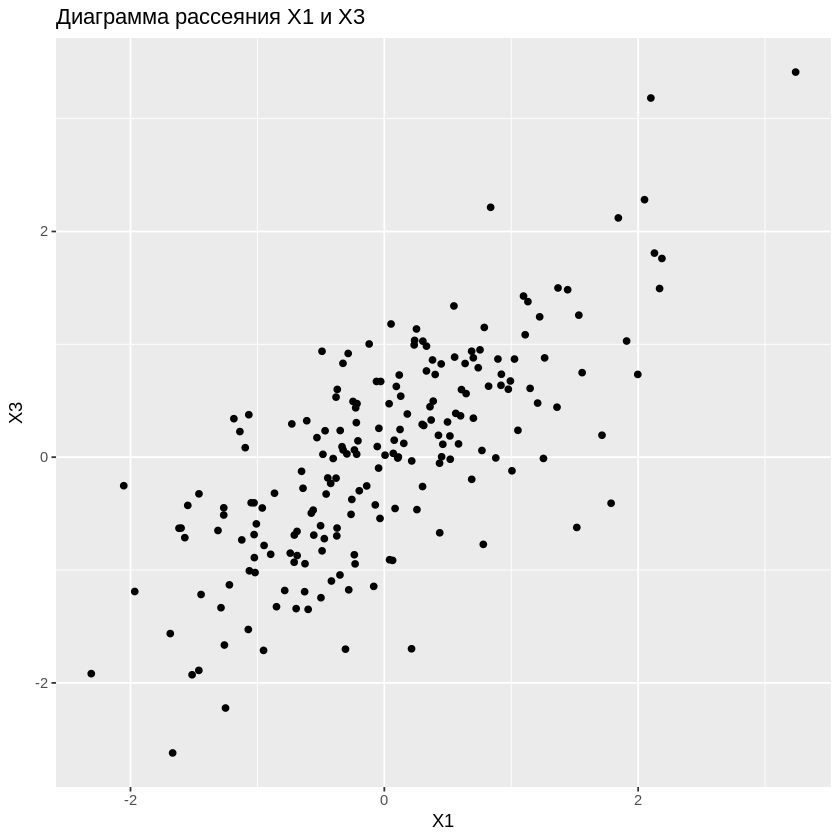

In [4]:
library(ggplot2)
df1 <- data.frame(X1 = X1, X2 = X2)
df2 <- data.frame(X1 = X1, X3 = X3)
p1 <- ggplot(df1, aes(x = X1, y = X2)) +
  geom_point() +
  labs(title = "Диаграмма рассеяния X1 и X2", x = "X1", y = "X2")
p2 <- ggplot(df2, aes(x = X1, y = X3)) +
  geom_point() +
  labs(title = "Диаграмма рассеяния X1 и X3", x = "X1", y = "X3")
print(p1)
print(p2)

Строим диаграммы рассеяния для пар (X1, X2) и (X1, X3) с помощью библиотеки ggplot2. Каждая точка на графике — это пара значений (X1[i], X2[i]) или (X1[i], X3[i]). Диаграммы показывают визуальную связь между переменными: чем выше корреляция, тем ближе точки к прямой линии.
На первом графике точки разбросаны (слабая связь), на втором — ближе к линии (сильная связь).

In [5]:
r_hat1 <- cor(X1, X2)
r_hat2 <- cor(X1, X3)
cat("Выборочный коэффициент корреляции между X1 и X2:", r_hat1, "\n")
cat("Выборочный коэффициент корреляции между X1 и X3:", r_hat2, "\n")

Выборочный коэффициент корреляции между X1 и X2: 0.1152459 
Выборочный коэффициент корреляции между X1 и X3: 0.7333573 


Вычисляем выборочные коэффициенты корреляции r̂1 и r̂2 для пар (X1, X2) и (X1, X3) с помощью функции cor(). Коэффициент корреляции Пирсона:

r̂ = Σ((X_i - X̄)(Y_i - Ȳ)) / sqrt(Σ(X_i - X̄)^2 * Σ(Y_i - Ȳ)^2).

Это оценка теоретических r1 и r2.

Простыми словами, считаем, насколько сильно X1 связан с X2 и X3 по данным. Числа должны быть близки к 0.15 и 0.75.

In [6]:
t_test1 <- cor.test(X1, X2)
t_test2 <- cor.test(X1, X3)
print(t_test1)
print(t_test2)


	Pearson's product-moment correlation

data:  X1 and X2
t = 1.6325, df = 198, p-value = 0.1042
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02387691  0.24998973
sample estimates:
      cor 
0.1152459 


	Pearson's product-moment correlation

data:  X1 and X3
t = 15.179, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6619696 0.7915597
sample estimates:
      cor 
0.7333573 



Проверяем гипотезу о наличии корреляционной связи (H0: r = 0 против H1: r ≠ 0) с помощью t-теста для коэффициентов корреляции. Используем функцию cor.test(), которая вычисляет статистику Стьюдента:

t = r̂ * sqrt(N - 2) / sqrt(1 - r̂^2),

где N — объем выборки, и сравнивает её с критическим значением t-распределения при α = 0.05.

Простыми словами, проверяем, есть ли связь между X1 и X2, X1 и X3. Если p-value маленькое (< 0.05), связь есть.

In [7]:
fisher_z_transform <- function(r) {
  0.5 * log((1 + r) / (1 - r))
}
inv_fisher_z_transform <- function(z) {
  (exp(2 * z) - 1) / (exp(2 * z) + 1)
}
z1 <- fisher_z_transform(r_hat1)
z2 <- fisher_z_transform(r_hat2)
se1 <- 1 / sqrt(N - 3)
se2 <- 1 / sqrt(N - 3)
z_lower1 <- z1 - qnorm(0.975) * se1
z_upper1 <- z1 + qnorm(0.975) * se1
z_lower2 <- z2 - qnorm(0.975) * se2
z_upper2 <- z2 + qnorm(0.975) * se2
ci1 <- c(inv_fisher_z_transform(z_lower1), inv_fisher_z_transform(z_upper1))
ci2 <- c(inv_fisher_z_transform(z_lower2), inv_fisher_z_transform(z_upper2))
cat("Доверительный интервал для коэффициента корреляции между X1 и X2:", ci1, "\n")
cat("Доверительный интервал для коэффициента корреляции между X1 и X3:", ci2, "\n")

Доверительный интервал для коэффициента корреляции между X1 и X2: -0.02387691 0.2499897 
Доверительный интервал для коэффициента корреляции между X1 и X3: 0.6619696 0.7915597 


Математическое пояснение:

Строим доверительные интервалы для истинных коэффициентов корреляции r1 и r2 с помощью Z-преобразования Фишера:

z = 0.5 * ln((1 + r̂) / (1 - r̂)) — преобразование корреляции,

стандартная ошибка se = 1 / sqrt(N - 3),

доверительный интервал в z-шкале: z ± z_(α/2) * se, где z_(α/2) — квантиль N(0,1) для 95% (≈ 1.96).

Обратное преобразование дает интервал для r.

Простыми словами:

Считаем диапазон, в котором с 95% вероятностью лежат настоящие корреляции для X1 и X2, X1 и X3.